In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx
import scipy as sc
from scipy.spatial import Delaunay
import random

import pickle

from simplicial_kuramoto import SimplicialComplex
from simplicial_kuramoto.graph_generator import modular_graph
from simplicial_kuramoto.integrators import *
from simplicial_kuramoto import plotting

In [2]:
def get_grid(n_node):

    x = np.linspace(0, 1, n_node)

    points = []
    for i in range(n_node):
        for j in range(n_node):
            points.append([x[j], x[i]])

    tri = Delaunay(points)

    edge_list = []
    for t in tri.simplices:
        edge_list.append([t[0], t[1]])
        edge_list.append([t[0], t[2]])
        edge_list.append([t[1], t[2]])

    graph = nx.Graph()
    graph.add_nodes_from(np.arange(len(points)))
    graph.add_edges_from(edge_list)
    return graph, points

{(0, 1): Text(0.125, 0.0, '0'),
 (0, 5): Text(0.0, 0.125, '1'),
 (1, 5): Text(0.125, 0.125, '2'),
 (1, 6): Text(0.25, 0.125, '3'),
 (1, 7): Text(0.375, 0.125, '4'),
 (1, 2): Text(0.375, 0.0, '5'),
 (2, 7): Text(0.5, 0.125, '6'),
 (2, 3): Text(0.625, 0.0, '7'),
 (3, 9): Text(0.875, 0.125, '8'),
 (3, 4): Text(0.875, 0.0, '9'),
 (3, 8): Text(0.75, 0.125, '10'),
 (3, 7): Text(0.625, 0.125, '11'),
 (4, 9): Text(1.0, 0.125, '12'),
 (5, 6): Text(0.125, 0.25, '13'),
 (5, 11): Text(0.125, 0.375, '14'),
 (5, 10): Text(0.0, 0.375, '15'),
 (6, 11): Text(0.25, 0.375, '16'),
 (6, 7): Text(0.375, 0.25, '17'),
 (7, 11): Text(0.375, 0.375, '18'),
 (7, 12): Text(0.5, 0.375, '19'),
 (7, 8): Text(0.625, 0.25, '20'),
 (7, 13): Text(0.625, 0.375, '21'),
 (8, 9): Text(0.875, 0.25, '22'),
 (8, 13): Text(0.75, 0.375, '23'),
 (9, 13): Text(0.875, 0.375, '24'),
 (9, 14): Text(1.0, 0.375, '25'),
 (10, 11): Text(0.125, 0.5, '26'),
 (10, 15): Text(0.0, 0.625, '27'),
 (11, 15): Text(0.125, 0.625, '28'),
 (11, 16): T

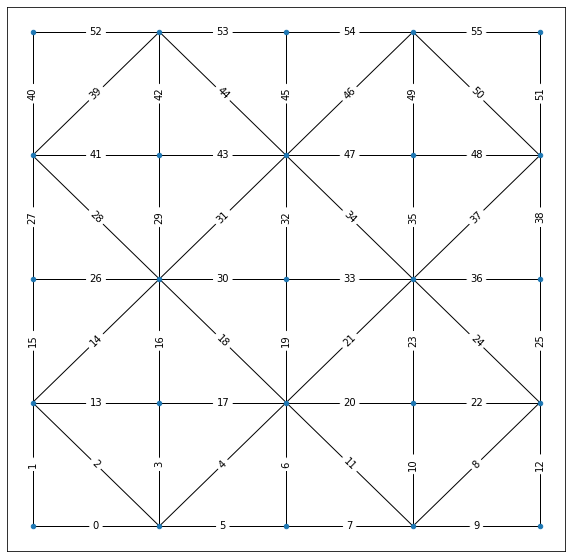

In [3]:
graph, points = get_grid(5)

plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(graph, pos=points, node_size=20)
nx.draw_networkx_edges(graph, pos=points)

labels = dict(((u, v), d) for d, (u, v) in enumerate(graph.edges))
nx.draw_networkx_edge_labels(graph, pos=points, edge_labels=labels)



We created 0 faces
Order parameter: [0.96428571 0.96428571 0.96428571 0.96428571 0.96428571 0.96428519
 0.95812228 0.95567404 0.95547473 0.95541512 0.95538272 0.9553648
 0.95535519 0.95535014 0.95534751 0.95534616 0.95534546 0.9553451
 0.95534492 0.95534482 0.95534477 0.95534475 0.95534473 0.95534473
 0.95534472 0.95534472 0.95534472 0.95534472 0.95534472 0.95534472
 0.95534472 0.95534472 0.95534472 0.95534472 0.95534472 0.95534472
 0.95534472 0.95534472 0.95534472 0.95534472 0.95534472 0.95534472
 0.95534472 0.95534472 0.95534472 0.95534472 0.95534472 0.95534472
 0.95534472 0.95534472 0.95534472 0.95534472 0.95534472 0.95534472
 0.95534472 0.95534472 0.95534472 0.95534472 0.95534472 0.95534472
 0.95534472 0.95534472 0.95534472 0.95534472 0.95534472 0.95534472
 0.95534472 0.95534472 0.95534472 0.95534472 0.95534472 0.95534472
 0.95534472 0.95534472 0.95534472 0.95534472 0.95534472 0.95534472
 0.95534472 0.95534472 0.95534472 0.95534472 0.95534472 0.95534472
 0.95534472 0.95534472 0.955

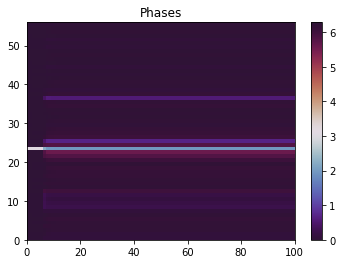

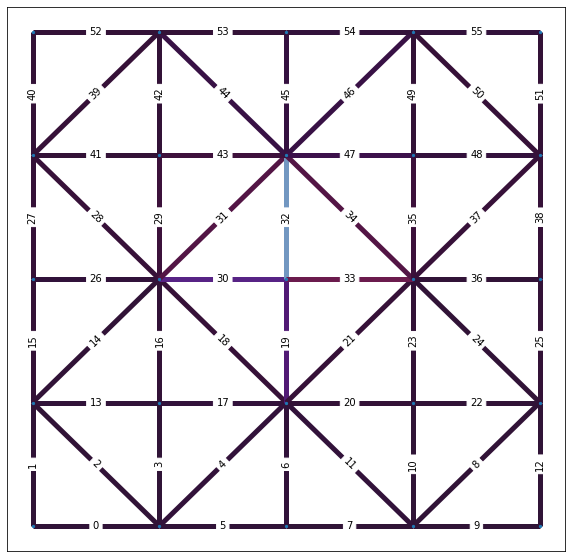

In [4]:

initial_phase = np.random.uniform(0, 2 * np.pi, len(graph.edges))

edge_flip=32
initial_phase = np.zeros(len(graph.edges))
initial_phase[edge_flip] = np.pi

t_max = 100
n_t = 100

complex_delaunay = SimplicialComplex(graph=graph, no_faces=True)

edge_result = integrate_edge_kuramoto(complex_delaunay, initial_phase, t_max, n_t)



plotting.plot_edge_kuramoto(edge_result)

plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(graph, pos=points, node_size=5)
nx.draw_networkx_edges(
        graph,
        pos=points,
        edge_color=edge_result.y[:, -1],
        edge_cmap=plt.get_cmap("twilight_shifted"),
        width=5,
        edge_vmin=np.min(edge_result.y),
        edge_vmax=np.max(edge_result.y),
    )

nx.draw_networkx_edge_labels(graph, pos=points, edge_labels=labels)

op = plotting.plot_order_parameter(edge_result.y, return_op=True, plot=False)
print('Order parameter: {}'.format(op))




We created 32 faces
Order parameter: 1.0


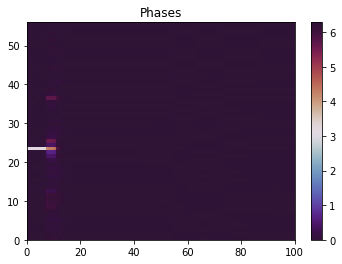

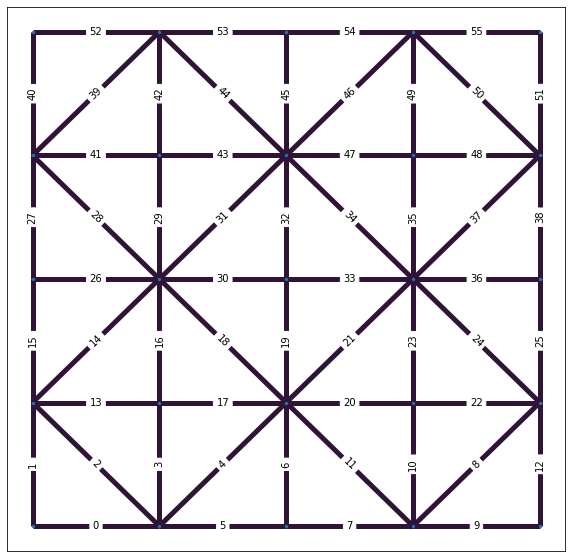

In [13]:


complex_delaunay = SimplicialComplex(graph=graph, no_faces=False)

edge_result = integrate_edge_kuramoto(complex_delaunay, initial_phase, t_max, n_t)



plotting.plot_edge_kuramoto(edge_result)


plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(graph, pos=points, node_size=5)
nx.draw_networkx_edges(
        graph,
        pos=points,
        edge_color=edge_result.y[:, -1],
        edge_cmap=plt.get_cmap("twilight_shifted"),
        width=5,
        edge_vmin=np.min(edge_result.y),
        edge_vmax=np.max(edge_result.y),
    )

nx.draw_networkx_edge_labels(graph, pos=points, edge_labels=labels)

op = plotting.plot_order_parameter(edge_result.y, return_op=True, plot=False)
print('Order parameter: {}'.format(op[-1]))


In [17]:
B0 = complex_delaunay.node_incidence_matrix
W0 = complex_delaunay.node_weights_matrix
B1 = complex_delaunay.edge_incidence_matrix
W1 = complex_delaunay.edge_weights_matrix
W2 = complex_delaunay.face_weights_matrix
omega_0 = np.zeros(complex_delaunay.n_edges)

Ld = W1.dot(B0.dot(W0.dot(B0.T)))
Lu = W1.dot(B1.T.dot(W2.dot(B1)))

L1 = Ld + Lu

L1.dot(edge_result.y[:,-1])



array([ 6.28318531e+00, -6.28318531e+00,  1.25663706e+01, -7.37188088e-14,
        1.88495559e+01,  1.25663706e+01,  2.51327412e+01, -6.28318531e+00,
        6.28318531e+00,  6.28318531e+00, -7.46675438e-14,  3.14159265e+01,
        7.68259270e-14,  1.88495559e+01, -6.28318531e+00,  6.28318531e+00,
       -3.19393316e-13,  2.51327412e+01, -1.25663706e+01, -6.28318531e+00,
       -1.25663706e+01, -2.51327412e+01, -3.71190071e-14, -2.93491868e-13,
        5.45938212e-14,  8.54339803e-14,  1.88495559e+01, -9.27928251e-14,
        6.28318531e+00, -2.58726374e-12,  1.88495559e+01, -3.14159265e+01,
       -6.28318531e+00, -6.28318531e+00, -1.88495559e+01, -2.61382466e-12,
       -1.99969058e-13, -8.41000478e-13,  6.28318531e+00,  6.28318531e+00,
       -1.92153087e-14, -6.15442296e-13, -6.25495819e-13, -1.25663706e+01,
        3.14159265e+01,  2.51327412e+01,  1.88495559e+01,  2.51327412e+01,
        1.88495559e+01, -6.25711875e-13,  1.25663706e+01, -6.28318531e+00,
        6.28318531e+00, -

# Increasing number of faces

In [47]:


initial_phase = np.zeros(len(graph.edges))

# randomly flip 10 edges
for j in range(10):
    initial_phase[np.random.randint(1,len(graph.edges))] = np.pi        


all_cliques = nx.enumerate_all_cliques(graph)
faces = [clique for clique in all_cliques if len(clique) == 3]

order = []
n_repeats = 10
for i in np.linspace(0, 30,31):
    order_repeat = []
    for k in range(0,n_repeats):
        rand_faces = random.sample(faces, int(i))
        complex_delaunay = SimplicialComplex(graph=graph, no_faces=False, faces=rand_faces)
        edge_result = integrate_edge_kuramoto(complex_delaunay, initial_phase, t_max, n_t)
        
        op = plotting.plot_order_parameter(edge_result.y, return_op=True, plot=False)        
        order_repeat.append(op[-1])
        
    order.append(order_repeat)





We created 0 faces
We created 0 faces
We created 0 faces
We created 0 faces
We created 0 faces
We created 0 faces
We created 0 faces
We created 0 faces
We created 0 faces
We created 0 faces
We created 1 faces
We created 1 faces
We created 1 faces
We created 1 faces
We created 1 faces
We created 1 faces
We created 1 faces
We created 1 faces
We created 1 faces
We created 1 faces
We created 2 faces
We created 2 faces
We created 2 faces
We created 2 faces
We created 2 faces
We created 2 faces
We created 2 faces
We created 2 faces
We created 2 faces
We created 2 faces
We created 3 faces
We created 3 faces
We created 3 faces
We created 3 faces
We created 3 faces
We created 3 faces
We created 3 faces
We created 3 faces
We created 3 faces
We created 3 faces
We created 4 faces
We created 4 faces
We created 4 faces
We created 4 faces
We created 4 faces
We created 4 faces
We created 4 faces
We created 4 faces
We created 4 faces
We created 4 faces
We created 5 faces
We created 5 faces
We created 5

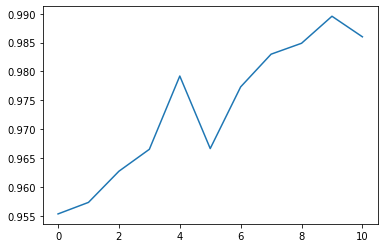

In [14]:
plt.plot(order)

# Increasing number of flipped edges 

In [37]:

n_repeats = 10
order = []
for i in range(len(graph.edges)):   
    order_repeat = []
    for k in range(n_repeats):
        initial_phase = np.zeros(len(graph.edges))


        for j in range(i):
            initial_phase[np.random.randint(1,len(graph.edges))] = np.pi        


        complex_delaunay = SimplicialComplex(graph=graph, no_faces=False)
        edge_result = integrate_edge_kuramoto(complex_delaunay, initial_phase, t_max, n_t)
        op = plotting.plot_order_parameter(edge_result.y, return_op=True, plot=False)
        print('Order parameter: {}'.format(op[-1]))
        order_repeat.append(op)
        
    order.append(order_repeat)


We created 32 faces
Order parameter: 1.0
We created 32 faces
Order parameter: 1.0
We created 32 faces
Order parameter: 1.0
We created 32 faces
Order parameter: 1.0
We created 32 faces
Order parameter: 1.0
We created 32 faces
Order parameter: 1.0
We created 32 faces
Order parameter: 1.0
We created 32 faces
Order parameter: 1.0
We created 32 faces
Order parameter: 1.0
We created 32 faces
Order parameter: 1.0
We created 32 faces
Order parameter: 1.0
We created 32 faces
Order parameter: 1.0
We created 32 faces
Order parameter: 1.0
We created 32 faces
Order parameter: 1.0
We created 32 faces
Order parameter: 1.0
We created 32 faces
Order parameter: 1.0
We created 32 faces
Order parameter: 1.0
We created 32 faces
Order parameter: 1.0
We created 32 faces
Order parameter: 1.0
We created 32 faces
Order parameter: 1.0
We created 32 faces
Order parameter: 0.891799570645692
We created 32 faces
Order parameter: 1.0
We created 32 faces
Order parameter: 0.8884768516588905
We created 32 faces
Order pa

Order parameter: 0.3361593874926218
We created 32 faces
Order parameter: 0.5143724415560069
We created 32 faces
Order parameter: 0.45382003328874115
We created 32 faces
Order parameter: 0.2677507392476385
We created 32 faces
Order parameter: 0.3895993119157719
We created 32 faces
Order parameter: 0.4577163065631543
We created 32 faces
Order parameter: 0.3795911808951444
We created 32 faces
Order parameter: 0.24027694171578604
We created 32 faces
Order parameter: 0.3208328942259419
We created 32 faces
Order parameter: 0.3782449832211991
We created 32 faces
Order parameter: 0.2863549149471182
We created 32 faces
Order parameter: 0.4743418233679603
We created 32 faces
Order parameter: 0.5256396999708508
We created 32 faces
Order parameter: 0.12675531216534894
We created 32 faces
Order parameter: 0.286030616642714
We created 32 faces
Order parameter: 0.23017600690197879
We created 32 faces
Order parameter: 0.3564452772071322
We created 32 faces
Order parameter: 0.2984120064868928
We create

Order parameter: 0.15265448007143242
We created 32 faces
Order parameter: 0.05524113456195876
We created 32 faces
Order parameter: 0.03487276384084523
We created 32 faces
Order parameter: 0.15726381038906978
We created 32 faces
Order parameter: 0.24917749777872275
We created 32 faces
Order parameter: 0.20117866951221375
We created 32 faces
Order parameter: 0.11294651401079271
We created 32 faces
Order parameter: 0.30181541735807393
We created 32 faces
Order parameter: 0.038335775510223304
We created 32 faces
Order parameter: 0.18140326783094696
We created 32 faces
Order parameter: 0.05073198741298691
We created 32 faces
Order parameter: 0.22412432777316596
We created 32 faces
Order parameter: 0.19212437093097812
We created 32 faces
Order parameter: 0.09569480026852044
We created 32 faces
Order parameter: 0.2425370746442057
We created 32 faces
Order parameter: 0.18930301796731533
We created 32 faces
Order parameter: 0.10504744673105046
We created 32 faces
Order parameter: 0.046586673005

Order parameter: 0.014424874541172097
We created 32 faces
Order parameter: 0.0832057162256076
We created 32 faces
Order parameter: 0.10632368833528091
We created 32 faces
Order parameter: 0.19544909926039353
We created 32 faces
Order parameter: 0.12249547209579384
We created 32 faces
Order parameter: 0.14721682585964607
We created 32 faces
Order parameter: 0.10241483031559946
We created 32 faces
Order parameter: 0.07691041476444838
We created 32 faces
Order parameter: 0.18178894598424875
We created 32 faces
Order parameter: 0.12382687055798416
We created 32 faces
Order parameter: 0.036354767865803585
We created 32 faces
Order parameter: 0.08455342512177501
We created 32 faces
Order parameter: 0.008717855648896634
We created 32 faces
Order parameter: 0.11710045920060444
We created 32 faces
Order parameter: 0.11997509471293263
We created 32 faces
Order parameter: 0.07346877223443074
We created 32 faces
Order parameter: 0.0661856486055943
We created 32 faces
Order parameter: 0.12858609637

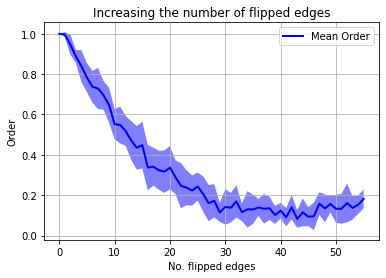

In [46]:
mean_order = np.array([np.mean(l) for l in order])
std_order = np.array([np.std(l) for l in order])

fig, ax = plt.subplots(1)
ax.plot(range(len(graph.edges)), mean_order, lw=2, label='Mean Order', color='blue')
ax.fill_between(range(len(graph.edges)), mean_order+std_order, mean_order-std_order, facecolor='blue', alpha=0.5)
ax.set_title('Increasing the number of flipped edges')
ax.legend(loc='upper right')
ax.set_xlabel('No. flipped edges')
ax.set_ylabel('Order')
ax.grid()


In [ ]:

edge_result = integrate_edge_kuramoto(complex_delaunay, initial_phase, t_max, n_t)



plotting.plot_edge_kuramoto(edge_result)


plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(graph, pos=points, node_size=5)
nx.draw_networkx_edges(
        graph,
        pos=points,
        edge_color=edge_result.y[:, -1],
        edge_cmap=plt.get_cmap("twilight_shifted"),
        width=5,
        edge_vmin=np.min(edge_result.y),
        edge_vmax=np.max(edge_result.y),
    )

nx.draw_networkx_edge_labels(graph, pos=points, edge_labels=labels)

op = plotting.plot_order_parameter(edge_result.y, return_op=True, plot=False)
print('Order parameter: {}'.format(op[-1]))


# Creating densities of faces


We created 0 faces
We created 1 faces
We created 2 faces
We created 3 faces
We created 4 faces
We created 5 faces
We created 6 faces
We created 7 faces
We created 8 faces
We created 9 faces
We created 10 faces
We created 11 faces
We created 12 faces
We created 13 faces
We created 14 faces
We created 15 faces
We created 16 faces
We created 17 faces
We created 18 faces
We created 19 faces
We created 20 faces
We created 21 faces
We created 22 faces
We created 23 faces
We created 24 faces
We created 25 faces
We created 26 faces
We created 27 faces
We created 28 faces
We created 29 faces
We created 30 faces
We created 31 faces
We created 0 faces
We created 1 faces
We created 2 faces
We created 3 faces
We created 4 faces
We created 5 faces
We created 6 faces
We created 7 faces
We created 8 faces
We created 9 faces
We created 10 faces
We created 11 faces
We created 12 faces
We created 13 faces
We created 14 faces
We created 15 faces
We created 16 faces
We created 17 faces
We created 18 faces


We created 1 faces
We created 2 faces
We created 3 faces
We created 4 faces
We created 5 faces
We created 6 faces
We created 7 faces
We created 8 faces
We created 9 faces
We created 10 faces
We created 11 faces
We created 12 faces
We created 13 faces
We created 14 faces
We created 15 faces
We created 16 faces
We created 17 faces
We created 18 faces
We created 19 faces
We created 20 faces
We created 21 faces
We created 22 faces
We created 23 faces
We created 24 faces
We created 25 faces
We created 26 faces
We created 27 faces
We created 28 faces
We created 29 faces
We created 30 faces
We created 31 faces
We created 0 faces
We created 1 faces
We created 2 faces
We created 3 faces
We created 4 faces
We created 5 faces
We created 6 faces
We created 7 faces
We created 8 faces
We created 9 faces
We created 10 faces
We created 11 faces
We created 12 faces
We created 13 faces
We created 14 faces
We created 15 faces
We created 16 faces
We created 17 faces
We created 18 faces
We created 19 faces

We created 2 faces
We created 3 faces
We created 4 faces
We created 5 faces
We created 6 faces
We created 7 faces
We created 8 faces
We created 9 faces
We created 10 faces
We created 11 faces
We created 12 faces
We created 13 faces
We created 14 faces
We created 15 faces
We created 16 faces
We created 17 faces
We created 18 faces
We created 19 faces
We created 20 faces
We created 21 faces
We created 22 faces
We created 23 faces
We created 24 faces
We created 25 faces
We created 26 faces
We created 27 faces
We created 28 faces
We created 29 faces
We created 30 faces
We created 31 faces
We created 0 faces
We created 1 faces
We created 2 faces
We created 3 faces
We created 4 faces
We created 5 faces
We created 6 faces
We created 7 faces
We created 8 faces
We created 9 faces
We created 10 faces
We created 11 faces
We created 12 faces
We created 13 faces
We created 14 faces
We created 15 faces
We created 16 faces
We created 17 faces
We created 18 faces
We created 19 faces
We created 20 face

We created 3 faces
We created 4 faces
We created 5 faces
We created 6 faces
We created 7 faces
We created 8 faces
We created 9 faces
We created 10 faces
We created 11 faces
We created 12 faces
We created 13 faces
We created 14 faces
We created 15 faces
We created 16 faces
We created 17 faces
We created 18 faces
We created 19 faces
We created 20 faces
We created 21 faces
We created 22 faces
We created 23 faces
We created 24 faces
We created 25 faces
We created 26 faces
We created 27 faces
We created 28 faces
We created 29 faces
We created 30 faces
We created 31 faces
We created 0 faces
We created 1 faces
We created 2 faces
We created 3 faces
We created 4 faces
We created 5 faces
We created 6 faces
We created 7 faces
We created 8 faces
We created 9 faces
We created 10 faces
We created 11 faces
We created 12 faces
We created 13 faces
We created 14 faces
We created 15 faces
We created 16 faces
We created 17 faces
We created 18 faces
We created 19 faces
We created 20 faces
We created 21 fac

We created 4 faces
We created 5 faces
We created 6 faces
We created 7 faces
We created 8 faces
We created 9 faces
We created 10 faces
We created 11 faces
We created 12 faces
We created 13 faces
We created 14 faces
We created 15 faces
We created 16 faces
We created 17 faces
We created 18 faces
We created 19 faces
We created 20 faces
We created 21 faces
We created 22 faces
We created 23 faces
We created 24 faces
We created 25 faces
We created 26 faces
We created 27 faces
We created 28 faces
We created 29 faces
We created 30 faces
We created 31 faces
We created 0 faces
We created 1 faces
We created 2 faces
We created 3 faces
We created 4 faces
We created 5 faces
We created 6 faces
We created 7 faces
We created 8 faces
We created 9 faces
We created 10 faces
We created 11 faces
We created 12 faces
We created 13 faces
We created 14 faces
We created 15 faces
We created 16 faces
We created 17 faces
We created 18 faces
We created 19 faces
We created 20 faces
We created 21 faces
We created 22 fa

We created 5 faces
We created 6 faces
We created 7 faces
We created 8 faces
We created 9 faces
We created 10 faces
We created 11 faces
We created 12 faces
We created 13 faces
We created 14 faces
We created 15 faces
We created 16 faces
We created 17 faces
We created 18 faces
We created 19 faces
We created 20 faces
We created 21 faces
We created 22 faces
We created 23 faces
We created 24 faces
We created 25 faces
We created 26 faces
We created 27 faces
We created 28 faces
We created 29 faces
We created 30 faces
We created 31 faces
We created 0 faces
We created 1 faces
We created 2 faces
We created 3 faces
We created 4 faces
We created 5 faces
We created 6 faces
We created 7 faces
We created 8 faces
We created 9 faces
We created 10 faces
We created 11 faces
We created 12 faces
We created 13 faces
We created 14 faces
We created 15 faces
We created 16 faces
We created 17 faces
We created 18 faces
We created 19 faces
We created 20 faces
We created 21 faces
We created 22 faces
We created 23 f

We created 6 faces
We created 7 faces
We created 8 faces
We created 9 faces
We created 10 faces
We created 11 faces
We created 12 faces
We created 13 faces
We created 14 faces
We created 15 faces
We created 16 faces
We created 17 faces
We created 18 faces
We created 19 faces
We created 20 faces
We created 21 faces
We created 22 faces
We created 23 faces
We created 24 faces
We created 25 faces
We created 26 faces
We created 27 faces
We created 28 faces
We created 29 faces
We created 30 faces
We created 31 faces
We created 0 faces
We created 1 faces
We created 2 faces
We created 3 faces
We created 4 faces
We created 5 faces
We created 6 faces
We created 7 faces
We created 8 faces
We created 9 faces
We created 10 faces
We created 11 faces
We created 12 faces
We created 13 faces
We created 14 faces
We created 15 faces
We created 16 faces
We created 17 faces
We created 18 faces
We created 19 faces
We created 20 faces
We created 21 faces
We created 22 faces
We created 23 faces
We created 24 

We created 7 faces
We created 8 faces
We created 9 faces
We created 10 faces
We created 11 faces
We created 12 faces
We created 13 faces
We created 14 faces
We created 15 faces
We created 16 faces
We created 17 faces
We created 18 faces
We created 19 faces
We created 20 faces
We created 21 faces
We created 22 faces
We created 23 faces
We created 24 faces
We created 25 faces
We created 26 faces
We created 27 faces
We created 28 faces
We created 29 faces
We created 30 faces
We created 31 faces
We created 0 faces
We created 1 faces
We created 2 faces
We created 3 faces
We created 4 faces
We created 5 faces
We created 6 faces
We created 7 faces
We created 8 faces
We created 9 faces
We created 10 faces
We created 11 faces
We created 12 faces
We created 13 faces
We created 14 faces
We created 15 faces
We created 16 faces
We created 17 faces
We created 18 faces
We created 19 faces
We created 20 faces
We created 21 faces
We created 22 faces
We created 23 faces
We created 24 faces
We created 25

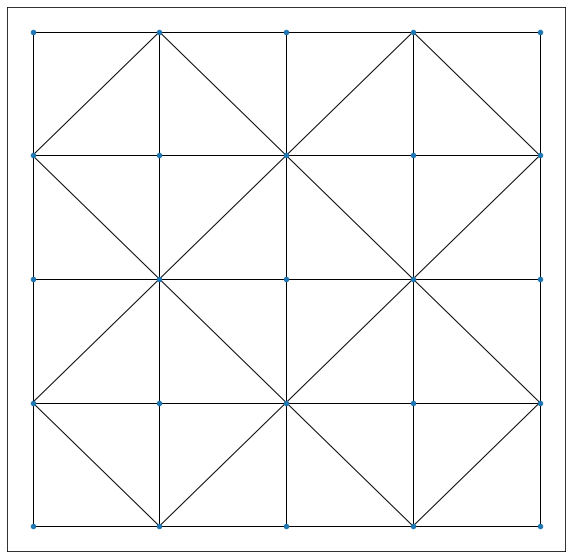

In [62]:
# adding faces at the centre of the grid

graph, points = get_grid(5)

plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(graph, pos=points, node_size=20)
nx.draw_networkx_edges(graph, pos=points)

all_cliques = nx.enumerate_all_cliques(graph)
faces = [clique for clique in all_cliques if len(clique) == 3]

face_coords = np.array([np.mean(np.vstack([points[node] for node in face]),axis=0).tolist() for face in faces])
face_distance_centre = np.sqrt(((face_coords - 0.5)**2).sum(axis=1))
order_distances = np.argsort(face_distance_centre ) # reverse order


n_repeats = 10
n_flips = np.linspace(1,10,10).astype(np.int64)

order = np.zeros([n_repeats,len(order_distances),len(n_flips)])

for f,n_flipped in enumerate(n_flips):
    for n in range(n_repeats):

        initial_phase = np.zeros(len(graph.edges))
        for k in range(n_flipped):
            initial_phase[np.random.randint(1,len(graph.edges))] = np.pi      

        t_max = 100
        n_t = 100

        # loop over the faces
        for i in range(len(order_distances)):
            top_faces_idx = order_distances[:i]
            faces_to_add = [faces[j] for j in top_faces_idx]

            if faces_to_add:
                complex_delaunay = SimplicialComplex(graph=graph, no_faces=False, faces=faces_to_add)
            else: 
                complex_delaunay = SimplicialComplex(graph=graph, no_faces=True)



            edge_result = integrate_edge_kuramoto(complex_delaunay, initial_phase, t_max, n_t)

            op = plotting.plot_order_parameter(edge_result.y, return_op=True, plot=False)        
            order[n,i,f] = op[-1]

filehandler = open("kuramoto_order_centre_faces.obj","wb")
pickle.dump(order,filehandler)
filehandler.close()
        

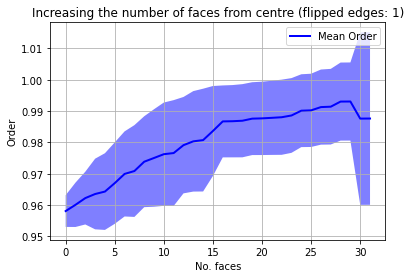

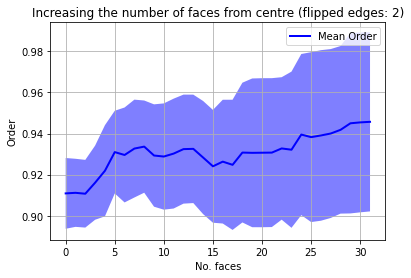

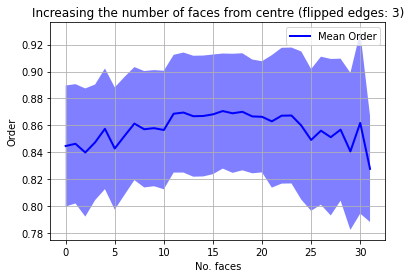

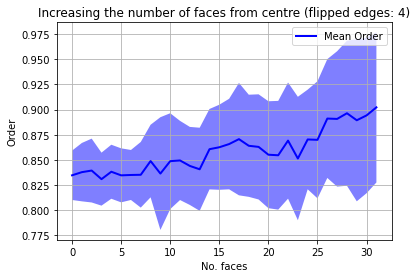

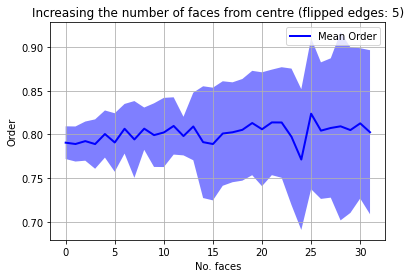

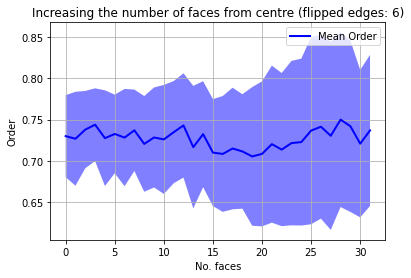

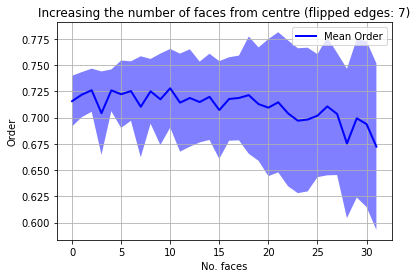

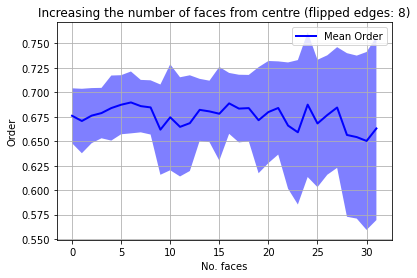

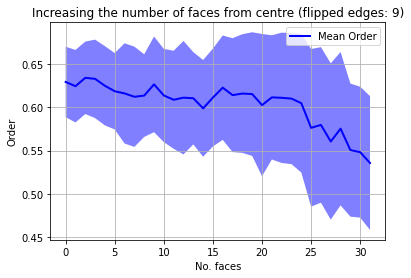

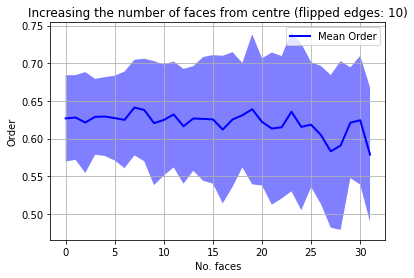

In [65]:

for k in range(10):
    mean_order = order[:,:,k].mean(axis=0)
    std_order = order[:,:,k].std(axis=0)

    fig, ax = plt.subplots(1)
    ax.plot(range(order.shape[1]), mean_order, lw=2, label='Mean Order', color='blue')
    ax.fill_between(range(order.shape[1]), mean_order+std_order, mean_order-std_order, facecolor='blue', alpha=0.5)
    ax.set_title('Increasing the number of faces from centre (flipped edges: {})'.format(k+1))
    ax.legend(loc='upper right')
    ax.set_xlabel('No. faces')
    ax.set_ylabel('Order')
    ax.grid()

We created 0 faces
We created 1 faces
We created 2 faces
We created 3 faces
We created 4 faces
We created 5 faces
We created 6 faces
We created 7 faces
We created 8 faces
We created 9 faces
We created 10 faces
We created 11 faces
We created 12 faces
We created 13 faces
We created 14 faces
We created 15 faces
We created 16 faces
We created 17 faces
We created 18 faces
We created 19 faces
We created 20 faces
We created 21 faces
We created 22 faces
We created 23 faces
We created 24 faces
We created 25 faces
We created 26 faces
We created 27 faces
We created 28 faces
We created 29 faces
We created 30 faces
We created 31 faces
We created 0 faces
We created 1 faces
We created 2 faces
We created 3 faces
We created 4 faces
We created 5 faces
We created 6 faces
We created 7 faces
We created 8 faces
We created 9 faces
We created 10 faces
We created 11 faces
We created 12 faces
We created 13 faces
We created 14 faces
We created 15 faces
We created 16 faces
We created 17 faces
We created 18 faces


We created 1 faces
We created 2 faces
We created 3 faces
We created 4 faces
We created 5 faces
We created 6 faces
We created 7 faces
We created 8 faces
We created 9 faces
We created 10 faces
We created 11 faces
We created 12 faces
We created 13 faces
We created 14 faces
We created 15 faces
We created 16 faces
We created 17 faces
We created 18 faces
We created 19 faces
We created 20 faces
We created 21 faces
We created 22 faces
We created 23 faces
We created 24 faces
We created 25 faces
We created 26 faces
We created 27 faces
We created 28 faces
We created 29 faces
We created 30 faces
We created 31 faces
We created 0 faces
We created 1 faces
We created 2 faces
We created 3 faces
We created 4 faces
We created 5 faces
We created 6 faces
We created 7 faces
We created 8 faces
We created 9 faces
We created 10 faces
We created 11 faces
We created 12 faces
We created 13 faces
We created 14 faces
We created 15 faces
We created 16 faces
We created 17 faces
We created 18 faces
We created 19 faces

We created 2 faces
We created 3 faces
We created 4 faces
We created 5 faces
We created 6 faces
We created 7 faces
We created 8 faces
We created 9 faces
We created 10 faces
We created 11 faces
We created 12 faces
We created 13 faces
We created 14 faces
We created 15 faces
We created 16 faces
We created 17 faces
We created 18 faces
We created 19 faces
We created 20 faces
We created 21 faces
We created 22 faces
We created 23 faces
We created 24 faces
We created 25 faces
We created 26 faces
We created 27 faces
We created 28 faces
We created 29 faces
We created 30 faces
We created 31 faces
We created 0 faces
We created 1 faces
We created 2 faces
We created 3 faces
We created 4 faces
We created 5 faces
We created 6 faces
We created 7 faces
We created 8 faces
We created 9 faces
We created 10 faces
We created 11 faces
We created 12 faces
We created 13 faces
We created 14 faces
We created 15 faces
We created 16 faces
We created 17 faces
We created 18 faces
We created 19 faces
We created 20 face

We created 3 faces
We created 4 faces
We created 5 faces
We created 6 faces
We created 7 faces
We created 8 faces
We created 9 faces
We created 10 faces
We created 11 faces
We created 12 faces
We created 13 faces
We created 14 faces
We created 15 faces
We created 16 faces
We created 17 faces
We created 18 faces
We created 19 faces
We created 20 faces
We created 21 faces
We created 22 faces
We created 23 faces
We created 24 faces
We created 25 faces
We created 26 faces
We created 27 faces
We created 28 faces
We created 29 faces
We created 30 faces
We created 31 faces
We created 0 faces
We created 1 faces
We created 2 faces
We created 3 faces
We created 4 faces
We created 5 faces
We created 6 faces
We created 7 faces
We created 8 faces
We created 9 faces
We created 10 faces
We created 11 faces
We created 12 faces
We created 13 faces
We created 14 faces
We created 15 faces
We created 16 faces
We created 17 faces
We created 18 faces
We created 19 faces
We created 20 faces
We created 21 fac

We created 4 faces
We created 5 faces
We created 6 faces
We created 7 faces
We created 8 faces
We created 9 faces
We created 10 faces
We created 11 faces
We created 12 faces
We created 13 faces
We created 14 faces
We created 15 faces
We created 16 faces
We created 17 faces
We created 18 faces
We created 19 faces
We created 20 faces
We created 21 faces
We created 22 faces
We created 23 faces
We created 24 faces
We created 25 faces
We created 26 faces
We created 27 faces
We created 28 faces
We created 29 faces
We created 30 faces
We created 31 faces
We created 0 faces
We created 1 faces
We created 2 faces
We created 3 faces
We created 4 faces
We created 5 faces
We created 6 faces
We created 7 faces
We created 8 faces
We created 9 faces
We created 10 faces
We created 11 faces
We created 12 faces
We created 13 faces
We created 14 faces
We created 15 faces
We created 16 faces
We created 17 faces
We created 18 faces
We created 19 faces
We created 20 faces
We created 21 faces
We created 22 fa

We created 5 faces
We created 6 faces
We created 7 faces
We created 8 faces
We created 9 faces
We created 10 faces
We created 11 faces
We created 12 faces
We created 13 faces
We created 14 faces
We created 15 faces
We created 16 faces
We created 17 faces
We created 18 faces
We created 19 faces
We created 20 faces
We created 21 faces
We created 22 faces
We created 23 faces
We created 24 faces
We created 25 faces
We created 26 faces
We created 27 faces
We created 28 faces
We created 29 faces
We created 30 faces
We created 31 faces
We created 0 faces
We created 1 faces
We created 2 faces
We created 3 faces
We created 4 faces
We created 5 faces
We created 6 faces
We created 7 faces
We created 8 faces
We created 9 faces
We created 10 faces
We created 11 faces
We created 12 faces
We created 13 faces
We created 14 faces
We created 15 faces
We created 16 faces
We created 17 faces
We created 18 faces
We created 19 faces
We created 20 faces
We created 21 faces
We created 22 faces
We created 23 f

We created 6 faces
We created 7 faces
We created 8 faces
We created 9 faces
We created 10 faces
We created 11 faces
We created 12 faces
We created 13 faces
We created 14 faces
We created 15 faces
We created 16 faces
We created 17 faces
We created 18 faces
We created 19 faces
We created 20 faces
We created 21 faces
We created 22 faces
We created 23 faces
We created 24 faces
We created 25 faces
We created 26 faces
We created 27 faces
We created 28 faces
We created 29 faces
We created 30 faces
We created 31 faces
We created 0 faces
We created 1 faces
We created 2 faces
We created 3 faces
We created 4 faces
We created 5 faces
We created 6 faces
We created 7 faces
We created 8 faces
We created 9 faces
We created 10 faces
We created 11 faces
We created 12 faces
We created 13 faces
We created 14 faces
We created 15 faces
We created 16 faces
We created 17 faces
We created 18 faces
We created 19 faces
We created 20 faces
We created 21 faces
We created 22 faces
We created 23 faces
We created 24 

We created 7 faces
We created 8 faces
We created 9 faces
We created 10 faces
We created 11 faces
We created 12 faces
We created 13 faces
We created 14 faces
We created 15 faces
We created 16 faces
We created 17 faces
We created 18 faces
We created 19 faces
We created 20 faces
We created 21 faces
We created 22 faces
We created 23 faces
We created 24 faces
We created 25 faces
We created 26 faces
We created 27 faces
We created 28 faces
We created 29 faces
We created 30 faces
We created 31 faces
We created 0 faces
We created 1 faces
We created 2 faces
We created 3 faces
We created 4 faces
We created 5 faces
We created 6 faces
We created 7 faces
We created 8 faces
We created 9 faces
We created 10 faces
We created 11 faces
We created 12 faces
We created 13 faces
We created 14 faces
We created 15 faces
We created 16 faces
We created 17 faces
We created 18 faces
We created 19 faces
We created 20 faces
We created 21 faces
We created 22 faces
We created 23 faces
We created 24 faces
We created 25

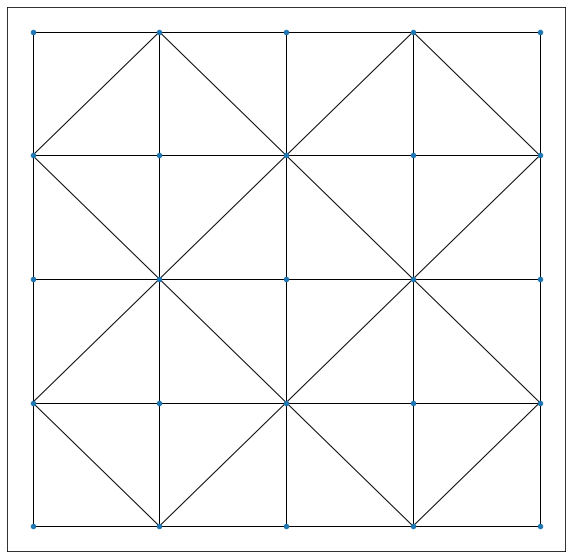

In [53]:
# adding faces at the edge of the grid


graph, points = get_grid(5)

plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(graph, pos=points, node_size=20)
nx.draw_networkx_edges(graph, pos=points)

all_cliques = nx.enumerate_all_cliques(graph)
faces = [clique for clique in all_cliques if len(clique) == 3]

face_coords = np.array([np.mean(np.vstack([points[node] for node in face]),axis=0).tolist() for face in faces])
face_distance_centre = np.sqrt(((face_coords - 0.5)**2).sum(axis=1))
order_distances = np.argsort(face_distance_centre )[::-1] # reverse order


n_repeats = 10
n_flips = np.linspace(1,10,10).astype(np.int64)

order_r = np.zeros([n_repeats,len(order_distances),len(n_flips)])

for f,n_flipped in enumerate(n_flips):
    for n in range(n_repeats):

        initial_phase = np.zeros(len(graph.edges))
        for k in range(n_flipped):
            initial_phase[np.random.randint(1,len(graph.edges))] = np.pi      

        t_max = 100
        n_t = 100

        # loop over the faces
        for i in range(len(order_distances)):
            top_faces_idx = order_distances[:i]
            faces_to_add = [faces[j] for j in top_faces_idx]

            if faces_to_add:
                complex_delaunay = SimplicialComplex(graph=graph, no_faces=False, faces=faces_to_add)
            else: 
                complex_delaunay = SimplicialComplex(graph=graph, no_faces=True)



            edge_result = integrate_edge_kuramoto(complex_delaunay, initial_phase, t_max, n_t)

            op = plotting.plot_order_parameter(edge_result.y, return_op=True, plot=False)        
            order_r[n,i,f] = op[-1]

filehandler = open("kuramoto_order_edge_faces.obj","wb")
pickle.dump(order_r,filehandler)
filehandler.close()

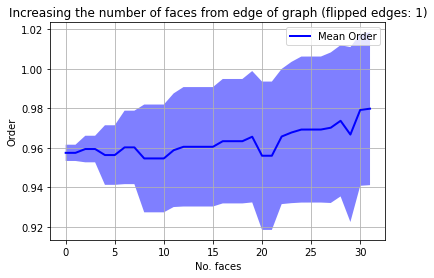

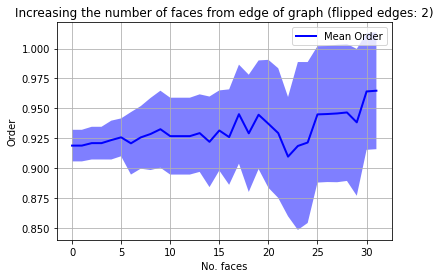

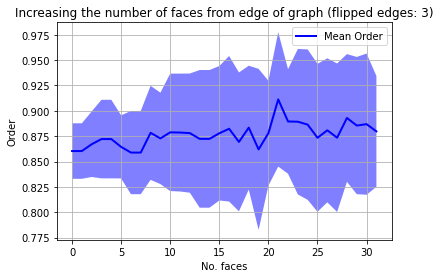

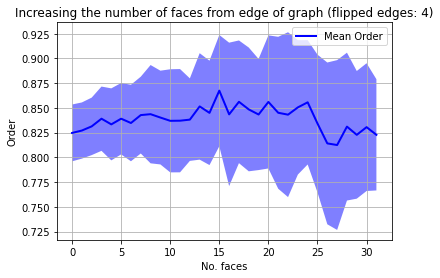

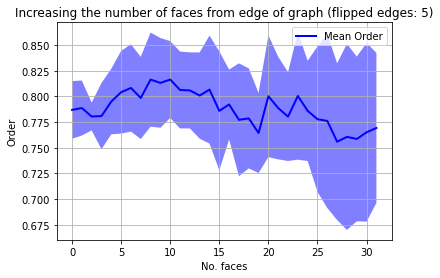

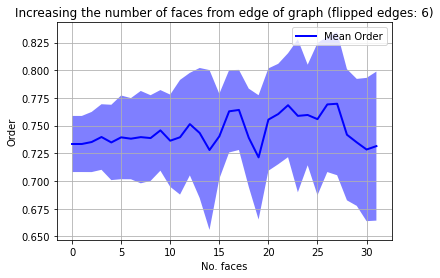

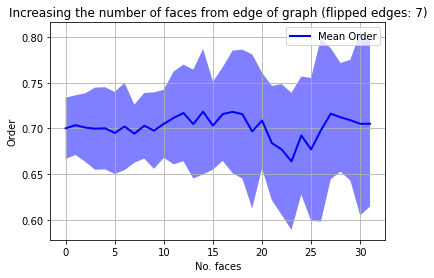

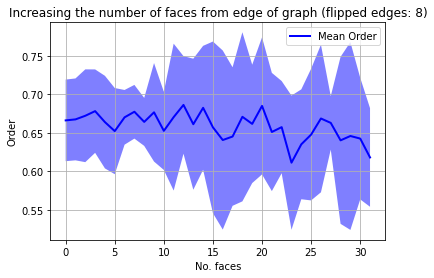

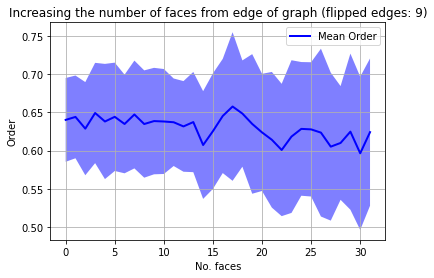

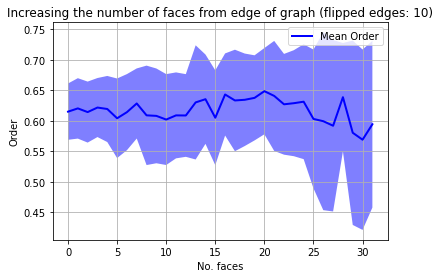

In [66]:

for k in range(10):
    mean_order = order_r[:,:,k].mean(axis=0)
    std_order = order_r[:,:,k].std(axis=0)

    fig, ax = plt.subplots(1)
    ax.plot(range(order_r.shape[1]), mean_order, lw=2, label='Mean Order', color='blue')
    ax.fill_between(range(order_r.shape[1]), mean_order+std_order, mean_order-std_order, facecolor='blue', alpha=0.5)
    ax.set_title('Increasing the number of faces from edge of graph (flipped edges: {})'.format(k+1))
    ax.legend(loc='upper right')
    ax.set_xlabel('No. faces')
    ax.set_ylabel('Order')
    ax.grid()

# confirm convergence